This timing example is inspired by: https://github.com/edkrueger/dot-product-timing/blob/master/dot_product_timing.ipynb

In [1]:
import numpy as np
from timeit import timeit
import matplotlib.pyplot as plt
from numba import jit
import matplotlib.pyplot as plt

In [2]:
# Create the vectors for NumPy-based timing.

a_array = np.random.randn(10**3)
b_array = np.random.randn(10**3)

# Create lists for the loop-based timing.

a_list = list(a_array)
b_list = list(b_array)

In [3]:
print("NumPy a_array (head):\n", a_array[:10])
print("\na_list (head):\n", a_list[:10])

NumPy a_array (head):
 [ 0.97730427  0.16236987  2.02189961  0.59135013 -0.45075845  1.29525757
 -1.03684911 -0.36714916 -0.34255067 -1.7279055 ]

a_list (head):
 [0.9773042697536674, 0.16236987373710673, 2.0218996148710517, 0.5913501320409195, -0.4507584513335131, 1.2952575736253222, -1.036849113286581, -0.3671491614765263, -0.3425506701984621, -1.7279054951319446]


In [4]:
def dot(a_array, b_array):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a_array, b_array):
        dot_product += a * b
    
    return dot_product

In [5]:
@jit(nopython=True)
def dot_numba(a_array, b_array):
    """
    Takes two vectors as a parameter and returns their dot product.
    Param: array-like floats
    Return: float
    """
    
    dot_product = 0
    for a, b in zip(a_array, b_array):
        dot_product += a * b
    
    return dot_product

In [6]:
# Find the average of 10 runs of the loop-based dot product function
# using arrays as inputs

%timeit -n 10 dot(a_array, b_array)

448 µs ± 214 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [7]:
# Same using Numba compiling, 2nd run
%timeit -n 10 dot_numba(a_array, b_array)

The slowest run took 53990.70 times longer than the fastest. This could mean that an intermediate result is being cached.
24.3 ms ± 59.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [8]:
# Find the average of 10 runs of the loop-based dot product function
# using lists as inputs

%timeit -n 10 dot(a_list, b_list)

214 µs ± 7.99 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [12]:
%timeit -n 10 dot_numba(a_list, b_list)

5.57 ms ± 454 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [13]:
# Find average of 10 runs of numpy's dot product

%timeit -n 10 np.dot(a_array, b_array)

47 µs ± 19.8 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# Make function for NumPy's dot product, which can then be Numba compiled.

@jit(nopython=True)
def dot_np_numba(a_array, b_array):
    return np.dot(a_array, b_array)

In [15]:
import bodo

@bodo.jit
def dot_np_bodo(a_array, b_array):
    return np.dot(a_array, b_array)

In [16]:
%timeit -n 10 dot_np_numba(a_array, b_array)

The slowest run took 28857.98 times longer than the fastest. This could mean that an intermediate result is being cached.
3.42 ms ± 8.38 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


Use timeit package to create an enviroment to time a function. 
It turns off garbage collection and caching by default.

In order to use timeit, create a function with no arguments to time. The timeit function from the timeit package expects a function with no arguments. This can be done by passing a lambda function, with no arguements, as an argument to timeit.

In [17]:
time = timeit(lambda: dot(a_array, b_array), number=10)

print(((time * 1000) / 10), "ms")

0.7479500000044936 ms


In [18]:
time = timeit(lambda: dot(a_list, b_list), number=10)

print(((time * 1000) / 10), "ms")

0.49180999999407504 ms


In [19]:
time = timeit(lambda: np.dot(a_array, b_array), number=10)

print(((time * 1000) / 10), "ms")

0.047010000002956076 ms


The caching problem does not apply anymore.

In [20]:
def time_function(function, *args, reps=100):
    """
    Times function execution reps times, and returns the average execution
    time in milliseconds.
    Param: function, function arguments
    Return: float
    """

    avg_time = timeit(lambda: function(*args), number=reps) / reps
    
    return avg_time * 1000

In [21]:
pyt_np = time_function(dot, a_array, b_array)
pyt_np

0.4140519999987191

In [22]:
pyt_list = time_function(dot, a_list, b_list)
pyt_list

0.4579050000006646

In [23]:
numba_list = time_function(dot_numba, a_list, b_list) 
numba_list

5.584714000001441

In [39]:
np_dot = time_function(np.dot, a_array, b_array)
np_dot

0.03295699999853241

In [40]:
numba = time_function(dot_np_numba, a_array, b_array)
numba

0.003805000001193548

In [41]:
bodo = time_function(dot_np_bodo, a_array, b_array)
bodo

0.003696000001127686

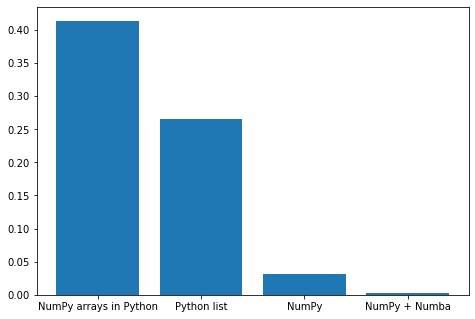

In [27]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['NumPy arrays in Python', 'Python list', 'NumPy', 'NumPy + Numba']
students = [pyt_np,pyt_list,np_dot,numba]
ax.bar(langs,students)
plt.show()

Lent's next see how the times change as the legth of the vector grows. 

Build a function to time the different dot product functions at different lengths. Timing the function multiple times using the same vector might produce an inaccurate result, because the dot product may be faster to compute for some vectors. Repeat over different vectors to ensure fair test.

In [27]:
def time_dot_product(
    func,
    vector_length,
    input_type = "array",
    data_reps = 10,
    reps = 10
):
    
    """
    Takes func, a function that perfroms a calculation on two vectors (array-lines) and   
    returns the times (in ms) the function takes to run on std. normal generated vectors.
    
    Arguments:
    ----------
    func (function): a function that perfroms a calculation on two vectors (array-lines)
    vector_length (int): the length that the radom vectors should be
    input_type (str): Vontrols the data type of the random vector. Takes values \"list\" or \"array\"
    data_reps (int): the number of times to generate the data
    reps (int): the number of time to run the timer for each data set
    """
    
    total_time = 0
    
    for i in range(0, data_reps):
        
        A = np.random.standard_normal(vector_length)
        B = np.random.standard_normal(vector_length)
        
        if input_type == "list":
            A = list(A)
            B = list(B)
            
        inst_time = time_function(func, A, B, reps=reps)
        
        total_time += inst_time
    
    avg_time = total_time / data_reps
    
    return avg_time

Time each of the functions for vectors of lengths 1 to 1,000,000. For a slower computer a lower order of magnitude should be chosen. With a faster computer, it might be interesting to see how the functions perform on much longer vectors.

In [28]:
# Create an array of increasing times

ord_mag = 6
lengths = [10 ** n for n in range(0, ord_mag + 1)]

In [29]:
loop_list_times = [time_dot_product(dot, e, "list") for e in lengths]
loop_list_times

[0.0029970000014145626,
 0.008071000006566464,
 0.057220999999572086,
 0.26652300000478135,
 2.2520639999970626,
 20.74105400000235,
 208.20484499999793]

In [30]:
loop_array_times = [time_dot_product(dot, length, "array") for length in lengths]
loop_array_times

[0.00277299999652314,
 0.005857999999534513,
 0.03460199999381075,
 0.4159270000036486,
 3.4732299999950556,
 28.957168999997975,
 286.6477069999951]

In [33]:
np_times = [time_dot_product(np.dot, length) for length in lengths]
np_times

[0.01483799999959956,
 0.016738000001623732,
 0.005698999998458021,
 0.006552999998348241,
 0.007450999999036867,
 0.05914699999948425,
 0.9742510000046423]

In [34]:
np_numba_times = [time_dot_product(dot_np_numba, length) for length in lengths]
np_numba_times

[0.0021679999986190523,
 0.002071999997497187,
 0.0027040000054512348,
 0.004087999998318992,
 0.007312000000183616,
 0.05725199999915276,
 0.9619620000034956]

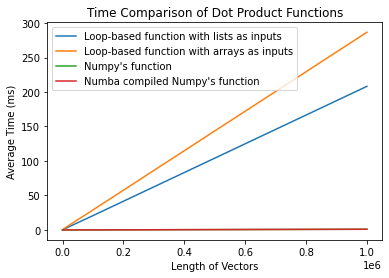

In [35]:
# plot numpy time v.s. loop time

plt.plot(lengths, loop_list_times, label = "Loop-based function with lists as inputs")
plt.plot(lengths, loop_array_times, label = "Loop-based function with arrays as inputs")
plt.plot(lengths, np_times, label = "Numpy's function")
plt.plot(lengths, np_numba_times, label = "Numba compiled Numpy's function")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

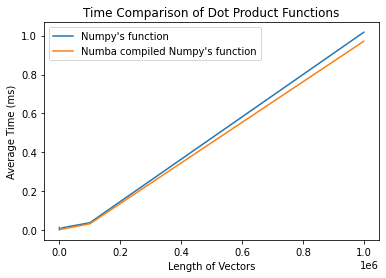

In [63]:
plt.plot(lengths, np_times, label = "Numpy's function")
plt.plot(lengths, np_numba_times, label = "Numba compiled Numpy's function")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

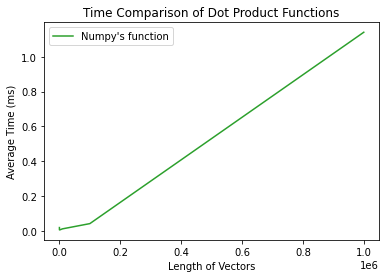

In [90]:
plt.plot(lengths, np_times, label = "Numpy's function", c = "C2")
plt.title("Time Comparison of Dot Product Functions")
plt.xlabel("Length of Vectors")
plt.ylabel("Average Time (ms)")
plt.legend()
plt.show()

In conclusion, one should use NumPy to compute a dot product and 
probably for other vector operations. However, it takes significantly 
more time to iterate over a NumPy array than a list. If one needs to 
write a loop, lists are faster.